In [13]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, kpss
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [3]:
df = pd.read_csv("./ori/preprocessed_monthly_data.csv")
df

,series_id,date,value
0,T1,1979-01,1149.8700
1,T1,1979-02,1053.8002
2,T1,1979-03,1388.8798
3,T1,1979-04,1783.3702
4,T1,1979-05,1921.0252
...,...,...,...
109275,T366,2000-08,7778.0000
109276,T366,2000-09,7859.0000
109277,T366,2000-10,4802.0000
109278,T366,2000-11,2426.0000


In [33]:
# 저장할 폴더 경로
output_folder = "data_mon"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# DataFrame df를 "series_id" 컬럼 기준으로 그룹화 후 각 그룹을 CSV 파일로 저장
for series_id, group in df.groupby('series_id'):
    file_name = f"{series_id}.csv"  # 예: T1.csv, T2.csv, ...
    file_path = os.path.join(output_folder, file_name)
    group.to_csv(file_path, index=False)
    print(f"{series_id} 그룹이 {file_path}에 저장되었습니다.")


T1 그룹이 data_mon\T1.csv에 저장되었습니다.
T10 그룹이 data_mon\T10.csv에 저장되었습니다.
T100 그룹이 data_mon\T100.csv에 저장되었습니다.
T101 그룹이 data_mon\T101.csv에 저장되었습니다.
T102 그룹이 data_mon\T102.csv에 저장되었습니다.
T103 그룹이 data_mon\T103.csv에 저장되었습니다.
T104 그룹이 data_mon\T104.csv에 저장되었습니다.
T105 그룹이 data_mon\T105.csv에 저장되었습니다.
T106 그룹이 data_mon\T106.csv에 저장되었습니다.
T107 그룹이 data_mon\T107.csv에 저장되었습니다.
T108 그룹이 data_mon\T108.csv에 저장되었습니다.
T109 그룹이 data_mon\T109.csv에 저장되었습니다.
T11 그룹이 data_mon\T11.csv에 저장되었습니다.
T110 그룹이 data_mon\T110.csv에 저장되었습니다.
T111 그룹이 data_mon\T111.csv에 저장되었습니다.
T112 그룹이 data_mon\T112.csv에 저장되었습니다.
T113 그룹이 data_mon\T113.csv에 저장되었습니다.
T114 그룹이 data_mon\T114.csv에 저장되었습니다.
T115 그룹이 data_mon\T115.csv에 저장되었습니다.
T116 그룹이 data_mon\T116.csv에 저장되었습니다.
T117 그룹이 data_mon\T117.csv에 저장되었습니다.
T118 그룹이 data_mon\T118.csv에 저장되었습니다.
T119 그룹이 data_mon\T119.csv에 저장되었습니다.
T12 그룹이 data_mon\T12.csv에 저장되었습니다.
T120 그룹이 data_mon\T120.csv에 저장되었습니다.
T121 그룹이 data_mon\T121.csv에 저장되었습니다.
T122 그룹이 data_mon\T122.csv에 저장되었습니다.
T123 그룹이 da

In [10]:
df = pd.read_csv("./data_mon/T1.csv")
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m')  # date 값을 연월 형식의 datetime으로 변환
df

,series_id,date,value
0,T1,1979-01-01,1149.8700
1,T1,1979-02-01,1053.8002
2,T1,1979-03-01,1388.8798
3,T1,1979-04-01,1783.3702
4,T1,1979-05-01,1921.0252
...,...,...,...
182,T1,1994-03-01,2466.3100
183,T1,1994-04-01,2851.7150
184,T1,1994-05-01,3671.8050
185,T1,1994-06-01,3806.7800


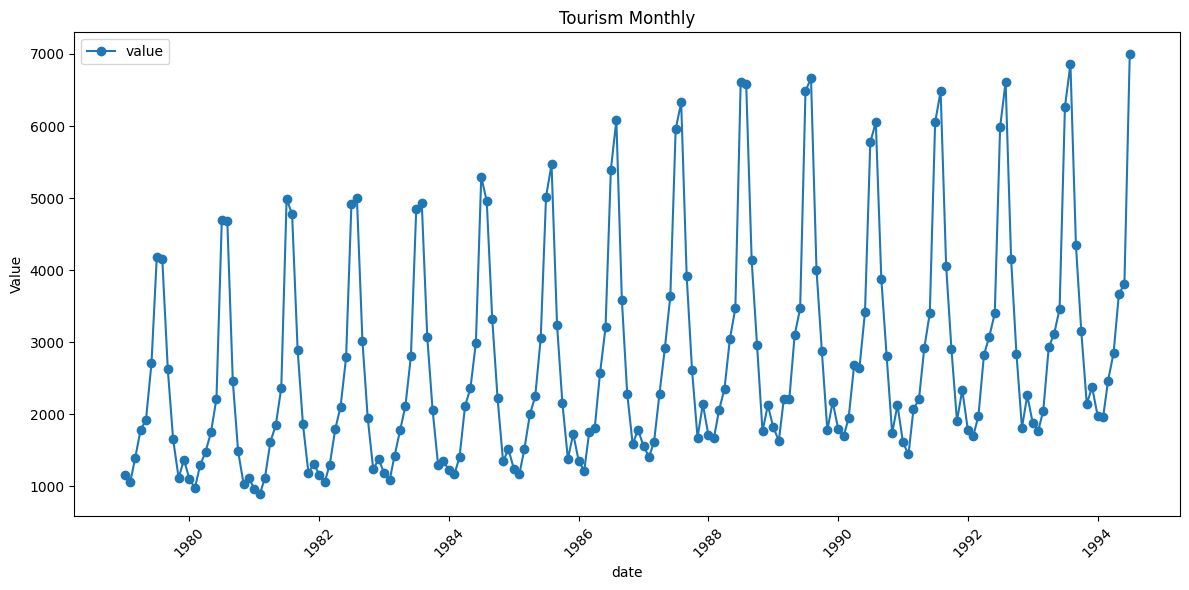

In [14]:
df = df.sort_values('date')

# 데이터 시각화 (예시: 'price_mean' 컬럼)
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['value'], marker='o', linestyle='-', label='value')
plt.xlabel('date')
plt.ylabel('Value')
plt.title('Tourism Monthly')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
def run_stationarity_tests(series):
    print("=== ADF 검정 결과 ===")
    adf_result = adfuller(series, autolag='AIC')
    adf_stat, adf_p, adf_lags, adf_nobs, adf_crit, adf_icbest = adf_result
    print(f"검정 통계량: {adf_stat:.4f}")
    print(f"p-value: {adf_p:.4f}")
    print(f"사용된 lag 수: {adf_lags}")
    print(f"관측치 수: {adf_nobs}")
    print("임계값:")
    for key, value in adf_crit.items():
        print(f"  {key} 유의수준: {value:.4f}")
        
    # ADF 검정의 귀무가설은 "단위근이 존재하여 시계열이 비정상이다"입니다.
    # 검정 통계량이 임계값보다 작으면 귀무가설을 기각하여 정상성을 인정함.
    if adf_stat < adf_crit["5%"]:
        adf_conclusion = "정상"
        print("=> ADF 검정 결과: 귀무가설(비정상)을 기각합니다. 시계열은 정상입니다.\n")
    else:
        adf_conclusion = "비정상"
        print("=> ADF 검정 결과: 귀무가설(비정상)을 기각하지 못했습니다. 시계열은 비정상입니다.\n")
    
    print("=== KPSS 검정 결과 ===")
    kpss_result = kpss(series, regression='c', nlags="auto")
    kpss_stat, kpss_p, kpss_lags, kpss_crit = kpss_result
    print(f"검정 통계량: {kpss_stat:.4f}")
    print(f"p-value: {kpss_p:.4f}")
    print(f"사용된 lag 수: {kpss_lags}")
    print("임계값:")
    for key, value in kpss_crit.items():
        print(f"  {key} 유의수준: {value:.4f}")
        
    # KPSS 검정의 귀무가설은 "시계열이 정상이다"입니다.
    # 검정 통계량이 각 유의수준의 임계값보다 크면 귀무가설을 기각하여 비정상으로 판단합니다.
    kpss_conclusion = "정상"
    for level, crit in kpss_crit.items():
        if kpss_stat > crit:
            kpss_conclusion = "비정상"
            print(f"{level} 유의수준: KPSS 검정 통계량이 임계값보다 큽니다. (비정상)")
        else:
            print(f"{level} 유의수준: KPSS 검정 통계량이 임계값 이하입니다. (정상)")
    
    print("\n=== 종합 결과 ===")
    print(f"ADF 검정 결론: {adf_conclusion}")
    print(f"KPSS 검정 결론: {kpss_conclusion}")
    
    if adf_conclusion == "정상" and kpss_conclusion == "정상":
        print("=> 최종 결론: 시계열은 정상입니다.")
    elif adf_conclusion == "비정상" and kpss_conclusion == "비정상":
        print("=> 최종 결론: 시계열은 비정상입니다.")
    else:
        print("=> 최종 결론: 검정 결과가 상반됩니다. 추가 분석이 필요합니다.")

# 예시 사용:
series = df['value']
run_stationarity_tests(series)


=== ADF 검정 결과 ===
검정 통계량: 0.1344
p-value: 0.9683
사용된 lag 수: 13
관측치 수: 173
임계값:
  1% 유의수준: -3.4687
  5% 유의수준: -2.8784
  10% 유의수준: -2.5758
=> ADF 검정 결과: 귀무가설(비정상)을 기각하지 못했습니다. 시계열은 비정상입니다.

=== KPSS 검정 결과 ===
검정 통계량: 0.8020
p-value: 0.0100
사용된 lag 수: 5
임계값:
  10% 유의수준: 0.3470
  5% 유의수준: 0.4630
  2.5% 유의수준: 0.5740
  1% 유의수준: 0.7390
10% 유의수준: KPSS 검정 통계량이 임계값보다 큽니다. (비정상)
5% 유의수준: KPSS 검정 통계량이 임계값보다 큽니다. (비정상)
2.5% 유의수준: KPSS 검정 통계량이 임계값보다 큽니다. (비정상)
1% 유의수준: KPSS 검정 통계량이 임계값보다 큽니다. (비정상)

=== 종합 결과 ===
ADF 검정 결론: 비정상
KPSS 검정 결론: 비정상
=> 최종 결론: 시계열은 비정상입니다.


C:\Users\admin\AppData\Local\Temp\ipykernel_29228\3863543515.py:23: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c', nlags="auto")


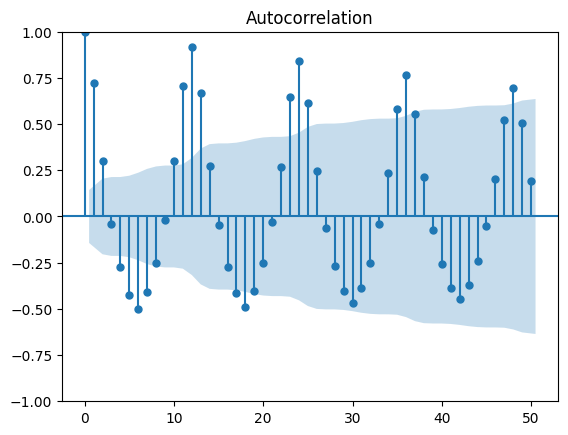

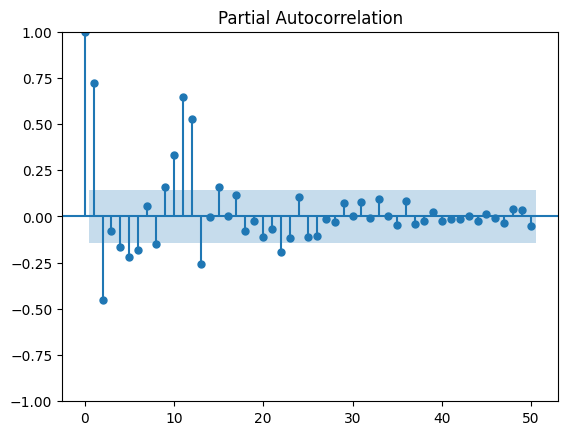

In [16]:
plot_acf(df['value'], lags=50)
plt.show()

plot_pacf(df['value'], lags=50)
plt.show()


In [20]:
import os
import pandas as pd
import glob

# CSV 파일들이 있는 디렉토리 경로
directory = "./data_mon"

# 디렉토리 내의 모든 CSV 파일 찾기
csv_files = glob.glob(os.path.join(directory, "*.csv"))

for csv_file in csv_files:
    # CSV 파일 읽기
    df = pd.read_csv(csv_file)
    
    # 'series_id' 칼럼이 있는 경우 제거
    if 'series_id' in df.columns:
        df = df.drop(columns=['series_id'])
        # 변경된 데이터프레임을 원본 파일에 덮어쓰기 (인덱스는 저장하지 않음)
        df.to_csv(csv_file, index=False)
        print(f"Processed file: {csv_file}")
    else:
        print(f"'series_id' column not found in: {csv_file}")


Processed file: ./data_mon\T1.csv
Processed file: ./data_mon\T10.csv
Processed file: ./data_mon\T100.csv
Processed file: ./data_mon\T101.csv
Processed file: ./data_mon\T102.csv
Processed file: ./data_mon\T103.csv
Processed file: ./data_mon\T104.csv
Processed file: ./data_mon\T105.csv
Processed file: ./data_mon\T106.csv
Processed file: ./data_mon\T107.csv
Processed file: ./data_mon\T108.csv
Processed file: ./data_mon\T109.csv
Processed file: ./data_mon\T11.csv
Processed file: ./data_mon\T110.csv
Processed file: ./data_mon\T111.csv
Processed file: ./data_mon\T112.csv
Processed file: ./data_mon\T113.csv
Processed file: ./data_mon\T114.csv
Processed file: ./data_mon\T115.csv
Processed file: ./data_mon\T116.csv
Processed file: ./data_mon\T117.csv
Processed file: ./data_mon\T118.csv
Processed file: ./data_mon\T119.csv
Processed file: ./data_mon\T12.csv
Processed file: ./data_mon\T120.csv
Processed file: ./data_mon\T121.csv
Processed file: ./data_mon\T122.csv
Processed file: ./data_mon\T123.c

In [ ]:
import os
import pandas as pd
import numpy as np
import time
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# ----------------------------
# Model Libraries
# ----------------------------
# ARIMA: SARIMAX from statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX
# SES and ETS: SimpleExpSmoothing and ExponentialSmoothing from statsmodels
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
# Prophet
from prophet import Prophet
# TBATS from tbats package
try:
    from tbats import TBATS
except Exception as e:
    print("TBATS 라이브러리가 설치되어 있지 않습니다.", e)
# Theta: from statsforecast
try:
    from statsforecast.models import Theta
    from statsforecast import StatsForecast
except Exception as e:
    print("Theta 모델 관련 라이브러리가 설치되어 있지 않습니다.", e)

# ----------------------------
# Evaluation Metric Functions
# ----------------------------
def calc_smape(actual, forecast, eps=1e-8):
    """Symmetric Mean Absolute Percentage Error"""
    return 100 * np.mean(2 * np.abs(forecast - actual) / (np.abs(actual) + np.abs(forecast) + eps))

def calc_mase(actual, forecast, train, eps=1e-8):
    """Mean Absolute Scaled Error using naive forecast (lag=1) for scaling"""
    mae = mean_absolute_error(actual, forecast)
    naive = train.shift(1)
    scale = np.mean(np.abs(train.dropna() - naive.dropna()))
    return mae / (scale + eps)

# ----------------------------
# 설정: CSV 파일들이 들어 있는 폴더 경로 (월간 데이터)
# ----------------------------
input_folder = "./data_mon"  # 실제 경로로 수정

# 결과를 저장할 리스트 (각 파일의 모델별 평가 결과 누적)
all_results = []

# ----------------------------
# 폴더 내의 각 CSV 파일 처리
# ----------------------------
for file in os.listdir(input_folder):
    if not file.endswith(".csv"):
        continue
    file_path = os.path.join(input_folder, file)
    
    try:
        # CSV 파일 읽기 (첫 번째 컬럼이 날짜 인덱스라고 가정)
        df_file = pd.read_csv(file_path, parse_dates=True, index_col=0)
    except Exception as e:
        print(f"{file} 읽기 에러: {e}")
        continue

    if 'value' not in df_file.columns:
        print(f"{file} 스킵: 'value' 컬럼 없음")
        continue

    # 인덱스를 datetime으로 강제 변환
    df_file.index = pd.to_datetime(df_file.index)
    
    # 타겟 시계열: value
    series = df_file['value'].dropna()
    if series.empty:
        print(f"{file} 스킵: 시계열 데이터가 비어 있음")
        continue

    # ----------------------------
    # 데이터 분할: 80% 학습, 20% 테스트
    # ----------------------------
    n_total = len(series)
    split_index = int(n_total * 0.8)
    train_series = series.iloc[:split_index]
    test_series = series.iloc[split_index:]
    horizon = len(test_series)
    actual = test_series.copy()
    
    # MASE 계산을 위한 scale: training 데이터의 naive forecast (lag=1)
    naive_forecast = train_series.shift(1)
    scale = np.mean(np.abs(train_series.dropna() - naive_forecast.dropna()))
    
    file_results = []  # 파일별 모델 평가 결과 저장 리스트

    # ----------------------------
    # Model 1: ARIMA (ARMA) using SARIMAX
    # 비정상 시계열 예측용으로 d=1, seasonal_order=(0,1,1,12) 사용 (주기가 12)
    # ----------------------------
    try:
        start = time.time()
        model_arima = SARIMAX(train_series, order=(1,1,1), seasonal_order=(0,1,1,12))
        fit_arima = model_arima.fit(disp=False)
        forecast_arima = fit_arima.forecast(steps=horizon)
        end = time.time()
        exec_time = end - start

        mae_val = mean_absolute_error(actual, forecast_arima)
        rmse_val = np.sqrt(mean_squared_error(actual, forecast_arima))
        smape_val = calc_smape(actual.values, forecast_arima.values)
        mase_val = calc_mase(actual, forecast_arima, train_series)
        
        file_results.append({
            'File': file,
            'Model': 'ARIMA',
            'sMAPE': smape_val,
            'MASE': mase_val,
            'MAE': mae_val,
            'RMSE': rmse_val,
            'Execution Time': exec_time
        })
        print(f"{file} - ARIMA 완료")
    except Exception as e:
        print(f"{file} - ARIMA 모델 에러: {e}")
    
    # ----------------------------
    # Model 2: SES using SimpleExpSmoothing
    # ----------------------------
    try:
        start = time.time()
        model_ses = SimpleExpSmoothing(train_series).fit(optimized=True)
        forecast_ses = model_ses.forecast(steps=horizon)
        end = time.time()
        exec_time = end - start

        mae_val = mean_absolute_error(actual, forecast_ses)
        rmse_val = np.sqrt(mean_squared_error(actual, forecast_ses))
        smape_val = calc_smape(actual.values, forecast_ses.values)
        mase_val = calc_mase(actual, forecast_ses, train_series)
        
        file_results.append({
            'File': file,
            'Model': 'SES',
            'sMAPE': smape_val,
            'MASE': mase_val,
            'MAE': mae_val,
            'RMSE': rmse_val,
            'Execution Time': exec_time
        })
        print(f"{file} - SES 완료")
    except Exception as e:
        print(f"{file} - SES 모델 에러: {e}")
    
    # ----------------------------
    # Model 3: Theta using statsforecast
    # ----------------------------
    try:
        start = time.time()
        train_df = pd.DataFrame({
            'ds': train_series.index, 
            'y': train_series.values, 
            'unique_id': 'series'
        })
        sf = StatsForecast(train_df, models=[Theta()], freq='M')
        forecast_df = sf.forecast(horizon, train_df)
        forecast_theta = forecast_df['Theta']
        end = time.time()
        exec_time = end - start

        mae_val = mean_absolute_error(actual, forecast_theta)
        rmse_val = np.sqrt(mean_squared_error(actual, forecast_theta))
        smape_val = calc_smape(actual.values, forecast_theta.values)
        mase_val = calc_mase(actual, forecast_theta, train_series)
        
        file_results.append({
            'File': file,
            'Model': 'Theta',
            'sMAPE': smape_val,
            'MASE': mase_val,
            'MAE': mae_val,
            'RMSE': rmse_val,
            'Execution Time': exec_time
        })
        print(f"{file} - Theta 완료")
    except Exception as e:
        print(f"{file} - Theta 모델 에러: {e}")
    
    # ----------------------------
    # Model 4: TBATS using tbats package
    # ----------------------------
    # try:
    #     start = time.time()
    #     # 데이터에 특별한 계절성이 없다고 가정하여 seasonal_periods 빈 리스트 사용
    #     estimator = TBATS(seasonal_periods=[])
    #     model_tbats = estimator.fit(train_series.values)
    #     forecast_tbats = model_tbats.forecast(steps=horizon)
    #     forecast_tbats = pd.Series(forecast_tbats, index=test_series.index)
    #     end = time.time()
    #     exec_time = end - start
    # 
    #     mae_val = mean_absolute_error(actual, forecast_tbats)
    #     rmse_val = np.sqrt(mean_squared_error(actual, forecast_tbats))
    #     smape_val = calc_smape(actual.values, forecast_tbats.values)
    #     mase_val = calc_mase(actual, forecast_tbats, train_series)
    #     
    #     file_results.append({
    #         'File': file,
    #         'Model': 'TBATS',
    #         'sMAPE': smape_val,
    #         'MASE': mase_val,
    #         'MAE': mae_val,
    #         'RMSE': rmse_val,
    #         'Execution Time': exec_time
    #     })
    #     print(f"{file} - TBATS 완료")
    # except Exception as e:
    #     print(f"{file} - TBATS 모델 에러: {e}")
    
    # ----------------------------
    # Model 5: ETS using ExponentialSmoothing
    # ----------------------------
    try:
        start = time.time()
        # 비정상 시계열 예측을 위해 additive 추세와 계절성을 사용 (seasonal_periods=12)
        model_ets = ExponentialSmoothing(train_series, trend='add', seasonal='add', seasonal_periods=12).fit(optimized=True)
        forecast_ets = model_ets.forecast(steps=horizon)
        end = time.time()
        exec_time = end - start

        mae_val = mean_absolute_error(actual, forecast_ets)
        rmse_val = np.sqrt(mean_squared_error(actual, forecast_ets))
        smape_val = calc_smape(actual.values, forecast_ets.values)
        mase_val = calc_mase(actual, forecast_ets, train_series)
        
        file_results.append({
            'File': file,
            'Model': 'ETS',
            'sMAPE': smape_val,
            'MASE': mase_val,
            'MAE': mae_val,
            'RMSE': rmse_val,
            'Execution Time': exec_time
        })
        print(f"{file} - ETS 완료")
    except Exception as e:
        print(f"{file} - ETS 모델 에러: {e}")
    
    # ----------------------------
    # Model 6: Prophet
    # ----------------------------
    try:
        start = time.time()
        train_prophet = pd.DataFrame({
            'ds': train_series.index, 
            'y': train_series.values
        })
        # Prophet은 ds에 타임존 정보가 있으면 에러 발생하므로 제거
        train_prophet['ds'] = pd.to_datetime(train_prophet['ds']).dt.tz_localize(None)
        model_prophet = Prophet()
        model_prophet.fit(train_prophet)
        future = model_prophet.make_future_dataframe(periods=horizon, freq='M', include_history=False)
        future['ds'] = pd.to_datetime(future['ds']).dt.tz_localize(None)
        forecast_prophet = model_prophet.predict(future)
        forecast_prophet = pd.Series(forecast_prophet['yhat'].values, index=test_series.index)
        end = time.time()
        exec_time = end - start

        mae_val = mean_absolute_error(actual, forecast_prophet)
        rmse_val = np.sqrt(mean_squared_error(actual, forecast_prophet))
        smape_val = calc_smape(actual.values, forecast_prophet.values)
        mase_val = calc_mase(actual, forecast_prophet, train_series)
        
        file_results.append({
            'File': file,
            'Model': 'Prophet',
            'sMAPE': smape_val,
            'MASE': mase_val,
            'MAE': mae_val,
            'RMSE': rmse_val,
            'Execution Time': exec_time
        })
        print(f"{file} - Prophet 완료")
    except Exception as e:
        print(f"{file} - Prophet 모델 에러: {e}")
    
    # 파일별 결과를 전체 결과 리스트에 추가
    for res in file_results:
        res['File'] = file  # 파일 이름 추가
    all_results.extend(file_results)

# ----------------------------
# 전체 데이터셋에 대한 모델별 평균 평가 지표 계산
# ----------------------------
results_df = pd.DataFrame(all_results)
if not results_df.empty:
    avg_results = results_df.drop(columns=['File']).groupby('Model').mean().reset_index()
    avg_results.to_csv("data_mon_forecast_evaluation_avg_metrics.csv", index=False)
    print("전체 데이터셋에 대한 평균 평가 지표가 'data_mon_forecast_evaluation_avg_metrics.csv'에 저장되었습니다.")
    print(avg_results)
else:
    print("평가 결과가 없습니다.")
